# Introduction
>XAI is a Machine Learning library that is designed with AI explainability in its core.

>XAI contains various tools that enable for analysis and evaluation of data and models.

>This notebook will walk you through the use of XAI. For the use of XAI you can use raw text data rather than machine learning ready data

# Imports

In [6]:
import xai
import pandas as pd

# Load Data

In [11]:
data = pd.read_csv('dataset/MCD_survey_data.csv')
data.head()

,first_name,last_name,age,email,country,postal_code,favorite_color,frequency_of_visits,favorite_menu_item,employment_status,Gender
0,Basilius,Atcheson,37,batcheson0@mozilla.org,Vietnam,NaN,red,4.4,Big Mac,Full-time,Male
1,Elston,Egar,51,eegar1@tuttocitta.it,China,NaN,blue,0.6,McNuggets,Part-time,Male
2,Stormi,Goldsby,51,sgoldsby2@ibm.com,Indonesia,NaN,red,5.5,Quarter Pounder,Retired,Female
3,Allie,Eskrick,35,aeskrick3@prlog.org,Portugal,7005-724,blue,5.2,Quarter Pounder,Retired,Male
4,Cornela,Skeffington,81,cskeffington4@archive.org,China,NaN,red,0.9,McNuggets,Student,Female


# Use of XAI

## Imbalance plot on specific field
> This feature allows you to understand the balance in your data for a specific field. This will tell you the mix of values that are present within a field and how they are spread within the dataset.

       'favorite_color', 'favorite_menu_item', 'employment_status', 'Gender'],
      dtype='object'). If you see an error these are not correct, please provide them as a string array as: categorical_cols=['col1', 'col2', ...]


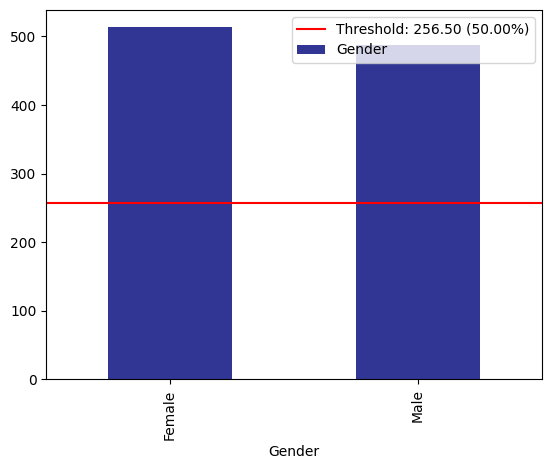

In [12]:
ims = xai.imbalance_plot(data,'Gender')

## Imbalance plot for all categories across multiple columns
> This feature allows you to understand the balance in your dataset across multiple columns

       'favorite_color', 'favorite_menu_item', 'employment_status', 'Gender'],
      dtype='object'). If you see an error these are not correct, please provide them as a string array as: categorical_cols=['col1', 'col2', ...]


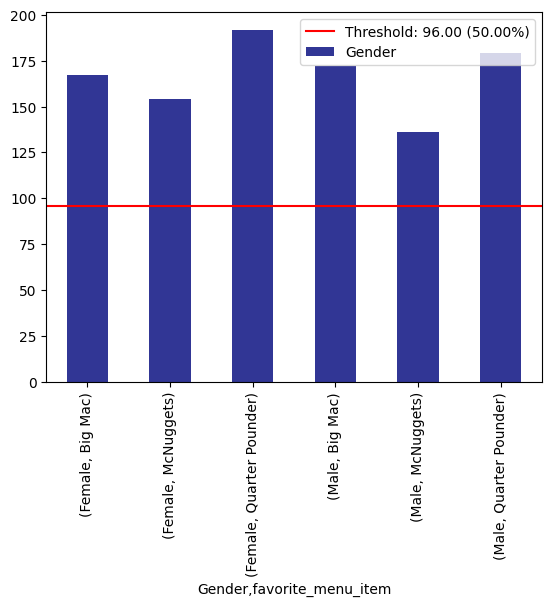

In [14]:
im = xai.imbalance_plot(data, 'Gender', 'favorite_menu_item')

## Balance classes using upsampling and/or downsompling

### Upsample example

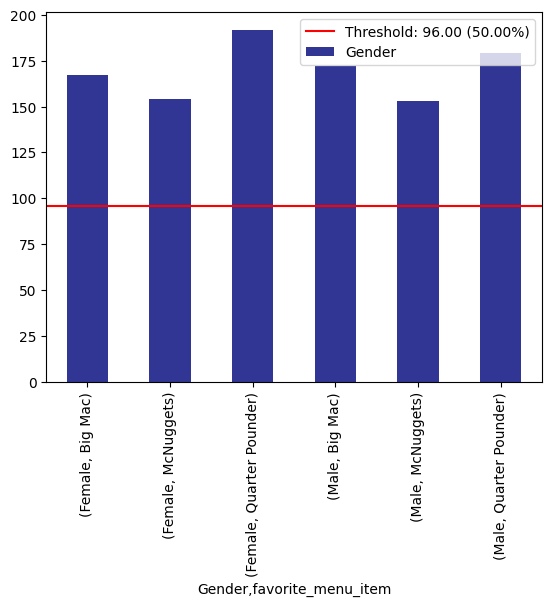

In [19]:
bal_df = xai.balance(data, "Gender", "favorite_menu_item", upsample = 0.8)

### Downsample example

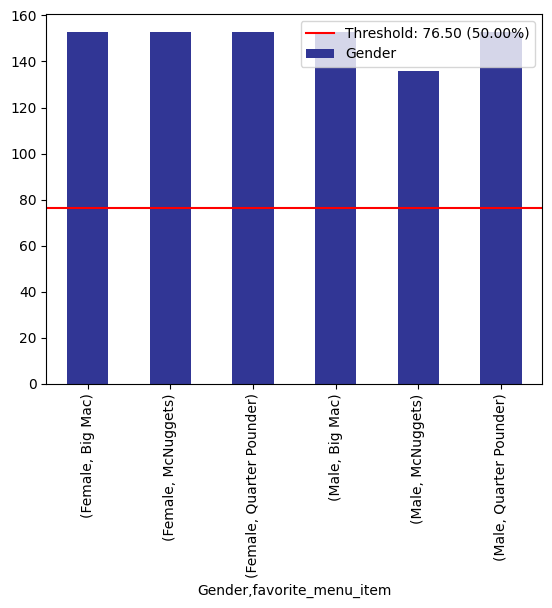

In [26]:
bal_df = xai.balance(data, "Gender", "favorite_menu_item", downsample = 0.8)

## Perform custom operations on groups

In [27]:
groups = xai.group_by_columns(data, ['Gender', 'favorite_menu_item'])
for group, group_df in groups:
    print(group)
    print(group_df['favorite_menu_item'].head(), "\n")

       'favorite_color', 'favorite_menu_item', 'employment_status', 'Gender'],
      dtype='object'). If you see an error these are not correct, please provide them as a string array as: categorical_cols=['col1', 'col2', ...]


('Female', 'Big Mac')
7     Big Mac
14    Big Mac
24    Big Mac
30    Big Mac
41    Big Mac
Name: favorite_menu_item, dtype: object 

('Female', 'McNuggets')
4     McNuggets
12    McNuggets
16    McNuggets
28    McNuggets
36    McNuggets
Name: favorite_menu_item, dtype: object 

('Female', 'Quarter Pounder')
2     Quarter Pounder
5     Quarter Pounder
13    Quarter Pounder
19    Quarter Pounder
33    Quarter Pounder
Name: favorite_menu_item, dtype: object 

('Male', 'Big Mac')
0     Big Mac
9     Big Mac
11    Big Mac
18    Big Mac
20    Big Mac
Name: favorite_menu_item, dtype: object 

('Male', 'McNuggets')
1     McNuggets
10    McNuggets
17    McNuggets
23    McNuggets
37    McNuggets
Name: favorite_menu_item, dtype: object 

('Male', 'Quarter Pounder')
3     Quarter Pounder
6     Quarter Pounder
8     Quarter Pounder
15    Quarter Pounder
29    Quarter Pounder
Name: favorite_menu_item, dtype: object 



## Balance a dataset
> This section will higlight how to use our dataset and balance it accordingly across relevant columns

> In this example we will create a balanced train-test split with minimum 300 examples of the corss of the target y and column gender

> You can set your own examples amount

In [39]:
x_train, y_train, x_test, y_test, train_idx, test_idx = \
    xai.balanced_train_test_split(
            x, y, "Gender", 
            min_per_group=300,
            max_per_group=300,
            categorical_cols=categorical_cols)

x_train_display = bal_df[train_idx]
x_test_display = bal_df[test_idx]

print("Total number of examples: ", x_test.shape[0])

df_test = x_test_display.copy()
df_test["loan"] = y_test

_= xai.imbalance_plot(df_test, "gender", "loan", categorical_cols=categorical_col)

NameError: name 'categorical_cols' is not defined

## Model Evaluation
> This section will highlight how to evaluate and assess a model that has been trained, areas to be covered:

* Standard model evaluation metrics

* Global model explanation techniques

* Black box local model explanation techniques

In [35]:
model = build_model(proc_df.drop("loan", axis=1))

model.fit(f_in(x_train), y_train, epochs=50, batch_size=512)

probabilities = model.predict(f_in(x_test))
predictions = list((probabilities >= 0.5).astype(int).T[0])

NameError: name 'build_model' is not defined